# Lab Work: Developing and Comparing AI Models for Android Malware Detection

## Objective:
The goal of this lab is to develop and evaluate multiple AI models for detecting Android malware using the provided Android Malware Dataset. Students will choose at least three different machine learning or deep learning algorithms to compare their performance in classifying Android applications as benign or malicious.

## Dataset Overview:
The **Android Malware Dataset for Machine Learning** contains labeled Android APK samples, classified as benign (goodware) or malicious (e.g., adware, spyware, trojans). It includes various features extracted from the APKs, such as requested permissions, API calls, system behaviors, and more, which can be used to train machine learning models.

## Tasks:

1. **Data Preprocessing**:
   - Load the dataset and clean it by handling missing values and converting categorical features into numerical ones if necessary.
   - Split the data into training and testing sets.

2. **Model Development**:
   - Choose at least **three AI algorithms** of your choice (e.g., Logistic Regression, Random Forest, SVM, Neural Networks, XGBoost, etc.).
   - Train each model on the dataset and evaluate their performance using accuracy, precision, recall, F1-score, and confusion matrix.

3. **Model Comparison**:
   - Compare the models based on their performance metrics.
   - Analyze which model performs best and why.

4. **Optional (Hyperparameter Tuning)**:
   - Optionally, apply techniques like grid search to optimize the model’s hyperparameters.


## Resources:
- Kaggle Dataset: [Android Malware Dataset for Machine Learning](https://www.kaggle.com/datasets/shashwatwork/android-malware-dataset-for-machine-learning)

You need to login in Kaggle to get access to the dataset.


In [2]:
#
#
#
#
# Your code to develop AI model for malware classification.
# Hint: Use the example code provided in previous lab.
#
#
#
#

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# No need to set a specific style - we'll use the default matplotlib style

In [14]:
# Load the dataset
print("Loading the Drebin dataset...")
df = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv')
print(f"Dataset shape: {df.shape}")

# Display basic information
print("\nTarget distribution:")
print(df['class'].value_counts())
print(df['class'].value_counts(normalize=True).round(4) * 100, '% of data')

# Check for missing values
missing_values = df.isnull().sum().sum()
print(f"\nTotal missing values: {missing_values}")

# Display a few rows
print("\nSample data:")
df.head()

Loading the Drebin dataset...
Dataset shape: (15036, 216)

Target distribution:
class
B    9476
S    5560
Name: count, dtype: int64
class
B    63.02
S    36.98
Name: proportion, dtype: float64 % of data

Total missing values: 0

Sample data:


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S


In [18]:
# Convert class labels: 'S' (Malware) -> 1, 'B' (Benign) -> 0
df['class'] = df['class'].map({'S': 1, 'B': 0})
print("Class mapping: 'S' (Malware) -> 1, 'B' (Benign) -> 0")

# Handle missing or invalid values (like '?')
# Replace '?' with NaN and then fill with 0 (or you could use mean imputation)
for col in df.columns:
    if df[col].dtype == object:  # Check if column has string values
        df[col] = df[col].replace('?', np.nan)
        # Convert to numeric after replacing '?' with NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill any remaining NaN values
df.fillna(0, inplace=True)

print(f"Data cleaned - replaced '?' values with 0")

# Split features and target
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Data preprocessing complete.")

Class mapping: 'S' (Malware) -> 1, 'B' (Benign) -> 0
Data cleaned - replaced '?' values with 0
Training set: 12028 samples
Testing set: 3008 samples
Data preprocessing complete.


In [24]:
# Load the dataset
print("Loading the Drebin dataset...")
df = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv')
print(f"Dataset shape: {df.shape}")

# Display basic information about the dataset
print("\nTarget distribution before mapping:")
print(df['class'].value_counts())

# First, check the actual unique values in the 'class' column
print("\nUnique values in 'class' column:")
unique_values = df['class'].unique()
print(unique_values)

# Based on the unique values, map correctly (adjust if the values are different)
# Note: If the values aren't 'S' and 'B', you'll need to adjust this mapping
if 'S' in unique_values and 'B' in unique_values:
    # The expected mapping
    class_mapping = {'S': 1, 'B': 0}
else:
    # If the values are different, try to determine which is malware/benign
    # Here's a generic approach (adjust as needed)
    unique_list = list(unique_values)
    class_mapping = {unique_list[0]: 1, unique_list[1]: 0}

print(f"\nUsing class mapping: {class_mapping}")
df['class'] = df['class'].map(class_mapping)

# Verify the mapping worked
print("\nTarget distribution after mapping:")
print(df['class'].value_counts())

# Handle missing or invalid values (like '?')
for col in df.columns:
    if df[col].dtype == object:  # Check if column has string values
        df[col] = df[col].replace('?', np.nan)
        # Convert to numeric
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill any remaining NaN values
df.fillna(0, inplace=True)
print("Cleaned data - replaced non-numeric values")

# Split features and target, ensuring we have both classes
X = df.drop('class', axis=1)
y = df['class']

# Verify we have both classes before splitting
print("\nTarget classes available:", np.unique(y))

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verify split worked correctly
print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Training set class distribution:")
print(pd.Series(y_train).value_counts())

print(f"\nTesting set: {X_test.shape[0]} samples")
print(f"Testing set class distribution:")
print(pd.Series(y_test).value_counts())

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nData preprocessing complete.")

Loading the Drebin dataset...
Dataset shape: (15036, 216)

Target distribution before mapping:
class
B    9476
S    5560
Name: count, dtype: int64

Unique values in 'class' column:
['S' 'B']

Using class mapping: {'S': 1, 'B': 0}

Target distribution after mapping:
class
0    9476
1    5560
Name: count, dtype: int64
Cleaned data - replaced non-numeric values

Target classes available: [0 1]

Training set: 12028 samples
Training set class distribution:
class
0    7580
1    4448
Name: count, dtype: int64

Testing set: 3008 samples
Testing set class distribution:
class
0    1896
1    1112
Name: count, dtype: int64

Data preprocessing complete.


In [26]:
# Function to evaluate and visualize model performance
def evaluate_model(model, X_test, y_test, model_name):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print metrics
    print(f"\n{model_name} Performance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Benign', 'Malware'], 
                yticklabels=['Benign', 'Malware'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
    
    # Print classification report
    print(f"\nClassification Report - {model_name}:")
    print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))
    
    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

Training Logistic Regression model...

Logistic Regression Performance Metrics:
Accuracy: 0.9784
Precision: 0.9738
Recall: 0.9676
F1 Score: 0.9707


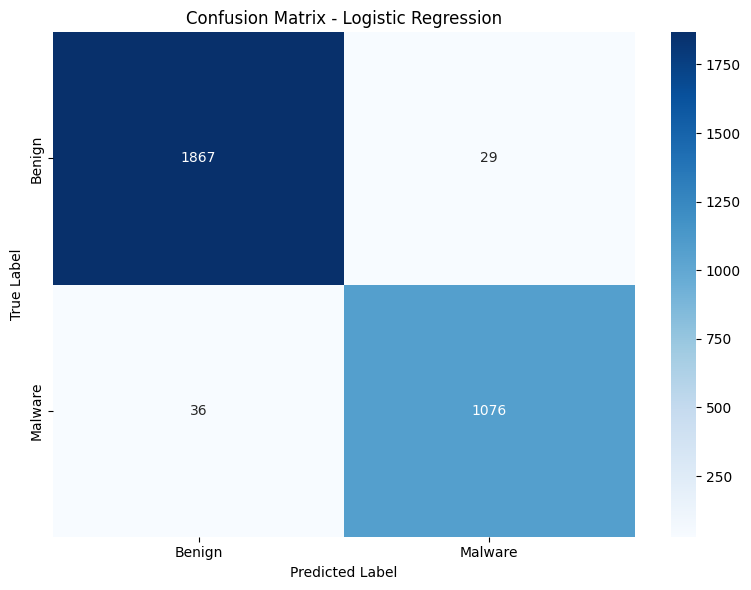


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

      Benign       0.98      0.98      0.98      1896
     Malware       0.97      0.97      0.97      1112

    accuracy                           0.98      3008
   macro avg       0.98      0.98      0.98      3008
weighted avg       0.98      0.98      0.98      3008



In [28]:
# Model 1: Logistic Regression
print("Training Logistic Regression model...")
lr_model = LogisticRegression(C=1.0, max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_results = evaluate_model(lr_model, X_test_scaled, y_test, "Logistic Regression")

Training Random Forest model...

Random Forest Performance Metrics:
Accuracy: 0.9880
Precision: 0.9909
Recall: 0.9766
F1 Score: 0.9837


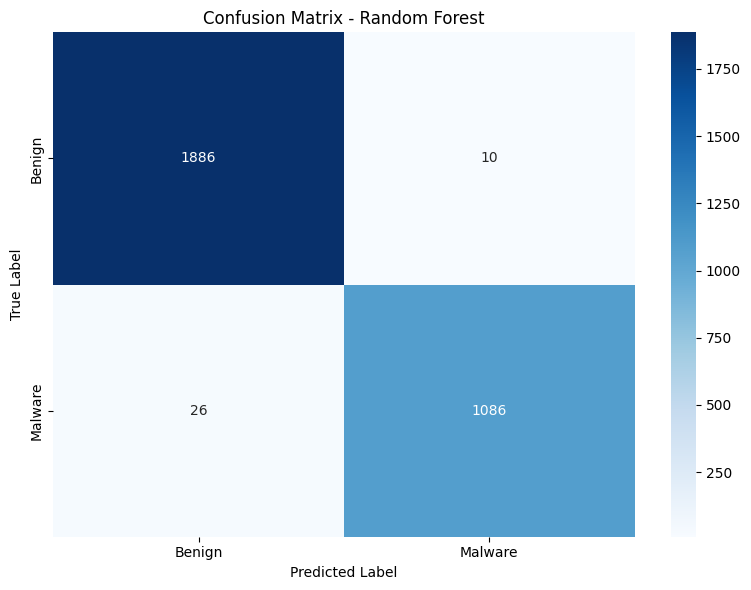


Classification Report - Random Forest:
              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99      1896
     Malware       0.99      0.98      0.98      1112

    accuracy                           0.99      3008
   macro avg       0.99      0.99      0.99      3008
weighted avg       0.99      0.99      0.99      3008



In [30]:
# Model 2: Random Forest
print("Training Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_results = evaluate_model(rf_model, X_test_scaled, y_test, "Random Forest")

Training Support Vector Machine model...

Support Vector Machine Performance Metrics:
Accuracy: 0.9804
Precision: 0.9739
Recall: 0.9730
F1 Score: 0.9735


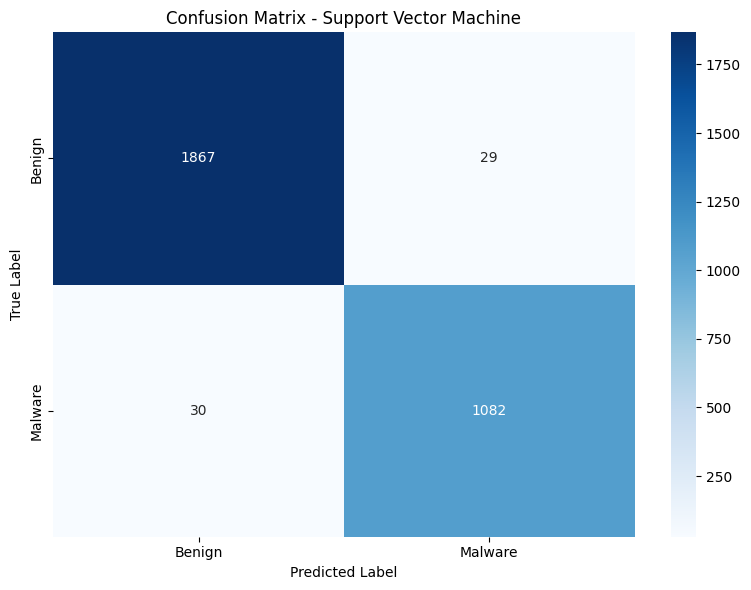


Classification Report - Support Vector Machine:
              precision    recall  f1-score   support

      Benign       0.98      0.98      0.98      1896
     Malware       0.97      0.97      0.97      1112

    accuracy                           0.98      3008
   macro avg       0.98      0.98      0.98      3008
weighted avg       0.98      0.98      0.98      3008



In [32]:
# Model 3: Support Vector Machine
print("Training Support Vector Machine model...")
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_results = evaluate_model(svm_model, X_test_scaled, y_test, "Support Vector Machine")


Model Comparison:
                        accuracy  precision    recall        f1
model_name                                                     
Logistic Regression     0.978391   0.973756  0.967626  0.970681
Random Forest           0.988032   0.990876  0.976619  0.983696
Support Vector Machine  0.980386   0.973897  0.973022  0.973459


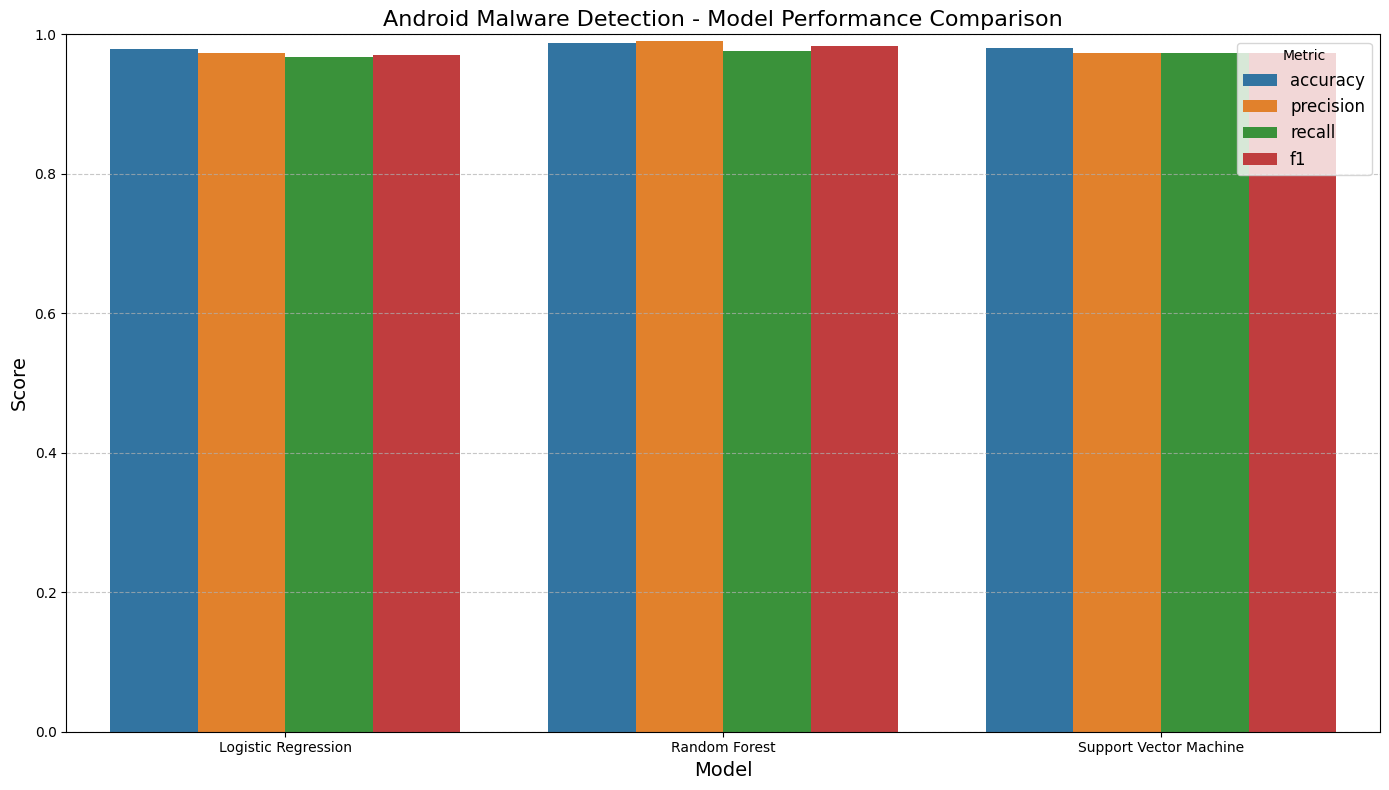

In [34]:
# Compare model performances
results = [lr_results, rf_results, svm_results]
metrics_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(metrics_df.set_index('model_name'))

# Create bar chart to compare model performance
plt.figure(figsize=(14, 8))
metrics_melted = pd.melt(metrics_df, id_vars=['model_name'], 
                         value_vars=['accuracy', 'precision', 'recall', 'f1'])

sns.barplot(x='model_name', y='value', hue='variable', data=metrics_melted)
plt.title('Android Malware Detection - Model Performance Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metric', fontsize=12)
plt.tight_layout()
plt.show()

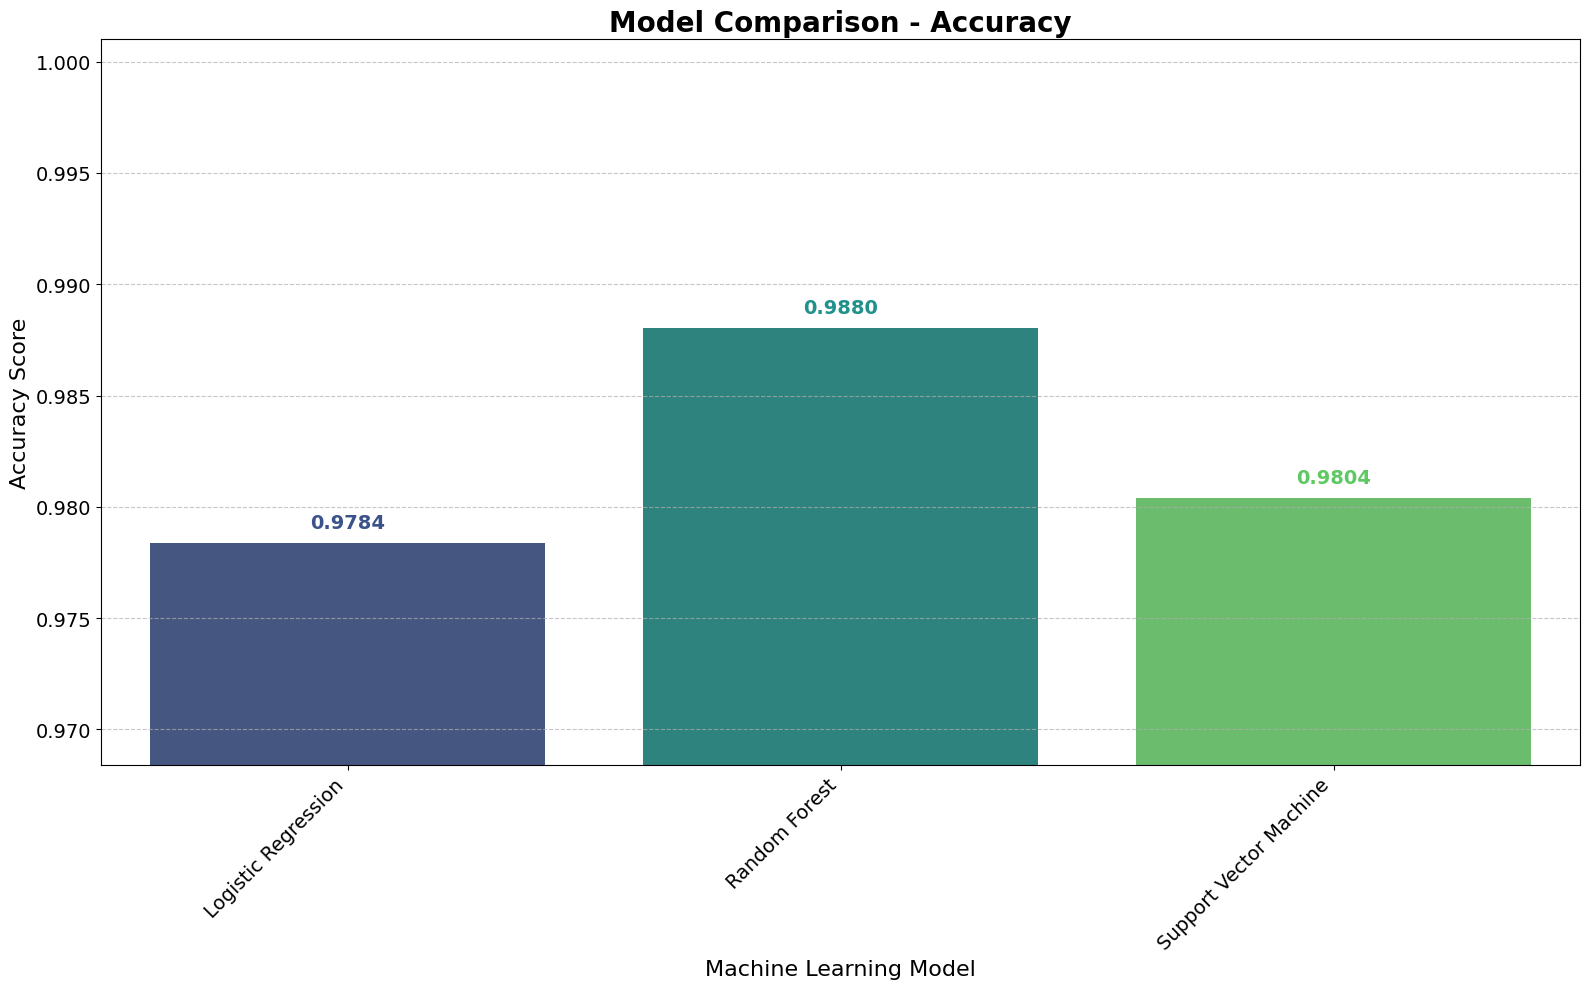

In [36]:
# Accuracy Comparison Visualization
plt.figure(figsize=(16, 10))

# Set a color palette for consistency
model_names = metrics_df['model_name']
colors = sns.color_palette("viridis", len(model_names))

# Plot with enhanced styling
ax = sns.barplot(x=model_names, y=metrics_df['accuracy'], palette=colors)

# Customize the plot
plt.title('Model Comparison - Accuracy', fontsize=20, fontweight='bold')
plt.xlabel('Machine Learning Model', fontsize=16)
plt.ylabel('Accuracy Score', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set y-axis limits to better visualize the differences
plt.ylim(metrics_df['accuracy'].min() - 0.01, 1.001)  # Dynamic adjustment with padding

# Add value labels on top of each bar
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.annotate(f"{height:.4f}", 
                (p.get_x() + p.get_width() / 2., height + 0.0005), 
                ha='center', va='bottom', 
                fontsize=14, fontweight='bold',
                color=colors[i])
    
# Add a horizontal line at the average accuracy (uncomment if needed)
# avg_accuracy = metrics_df['accuracy'].mean()
# plt.axhline(y=avg_accuracy, color='r', linestyle='--', alpha=0.7, 
#             label=f'Average Accuracy: {avg_accuracy:.4f}')
# plt.legend(fontsize=14)

plt.tight_layout()
plt.savefig('accuracy_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

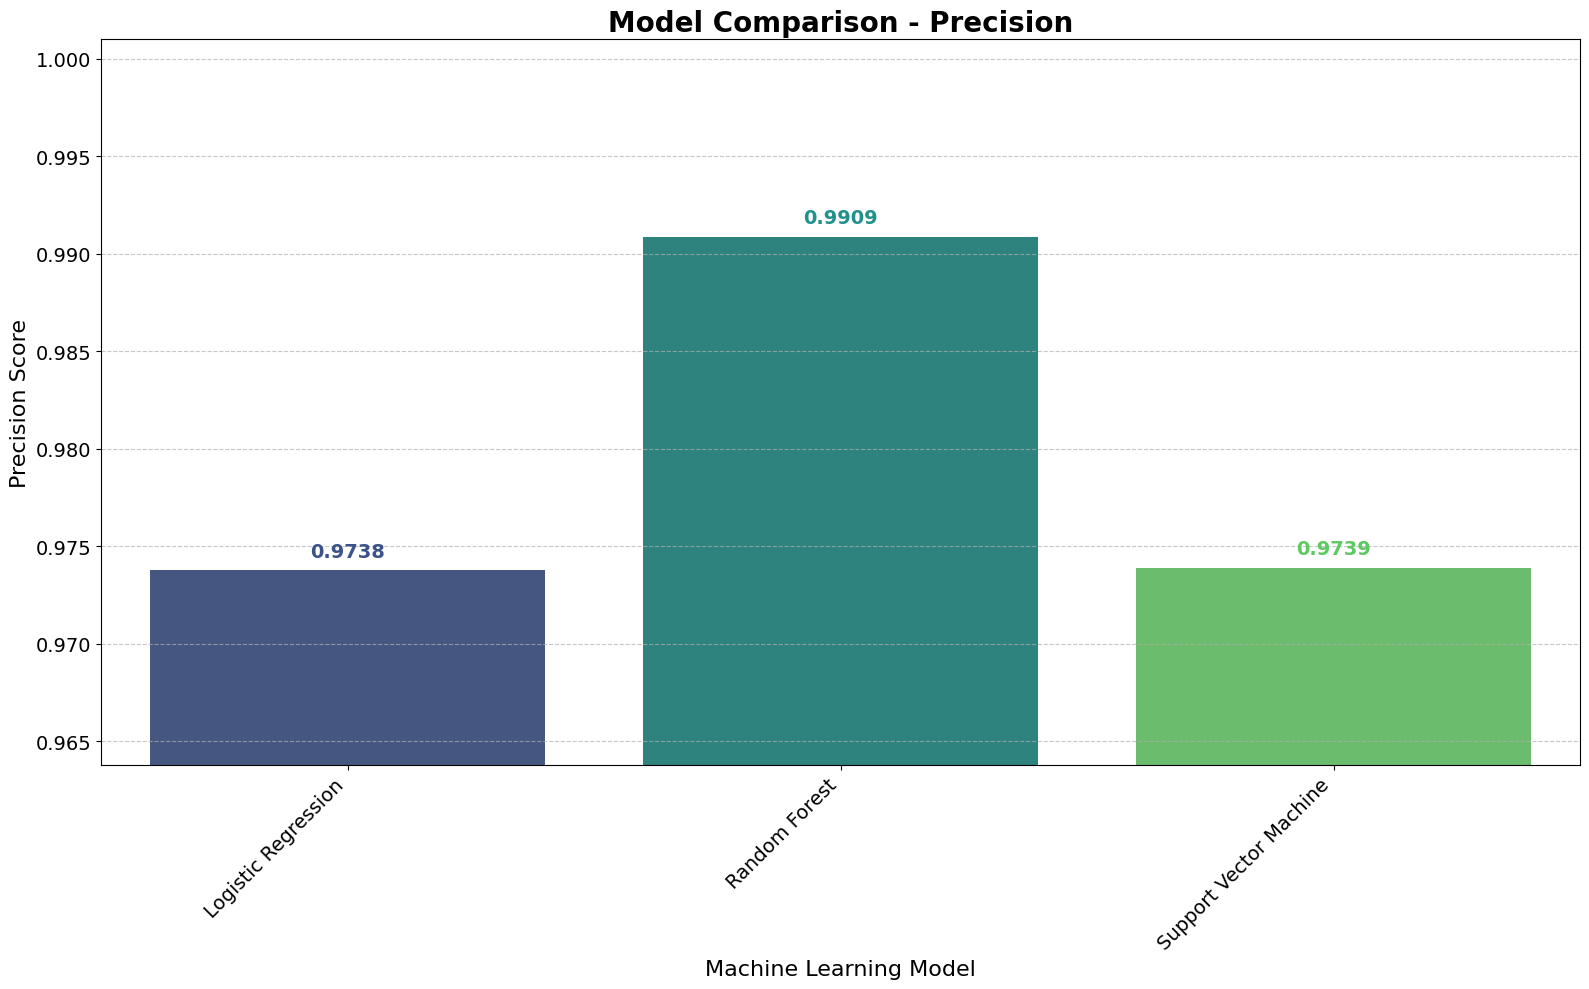

In [38]:
# Precision Comparison Visualization
plt.figure(figsize=(16, 10))

# Set a color palette for consistency
model_names = metrics_df['model_name']
colors = sns.color_palette("viridis", len(model_names))

# Plot with enhanced styling
ax = sns.barplot(x=model_names, y=metrics_df['precision'], palette=colors)

# Customize the plot
plt.title('Model Comparison - Precision', fontsize=20, fontweight='bold')
plt.xlabel('Machine Learning Model', fontsize=16)
plt.ylabel('Precision Score', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set y-axis limits to better visualize the differences
plt.ylim(metrics_df['precision'].min() - 0.01, 1.001)  # Dynamic adjustment with padding

# Add value labels on top of each bar
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.annotate(f"{height:.4f}", 
                (p.get_x() + p.get_width() / 2., height + 0.0005), 
                ha='center', va='bottom', 
                fontsize=14, fontweight='bold',
                color=colors[i])

plt.tight_layout()
plt.savefig('precision_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

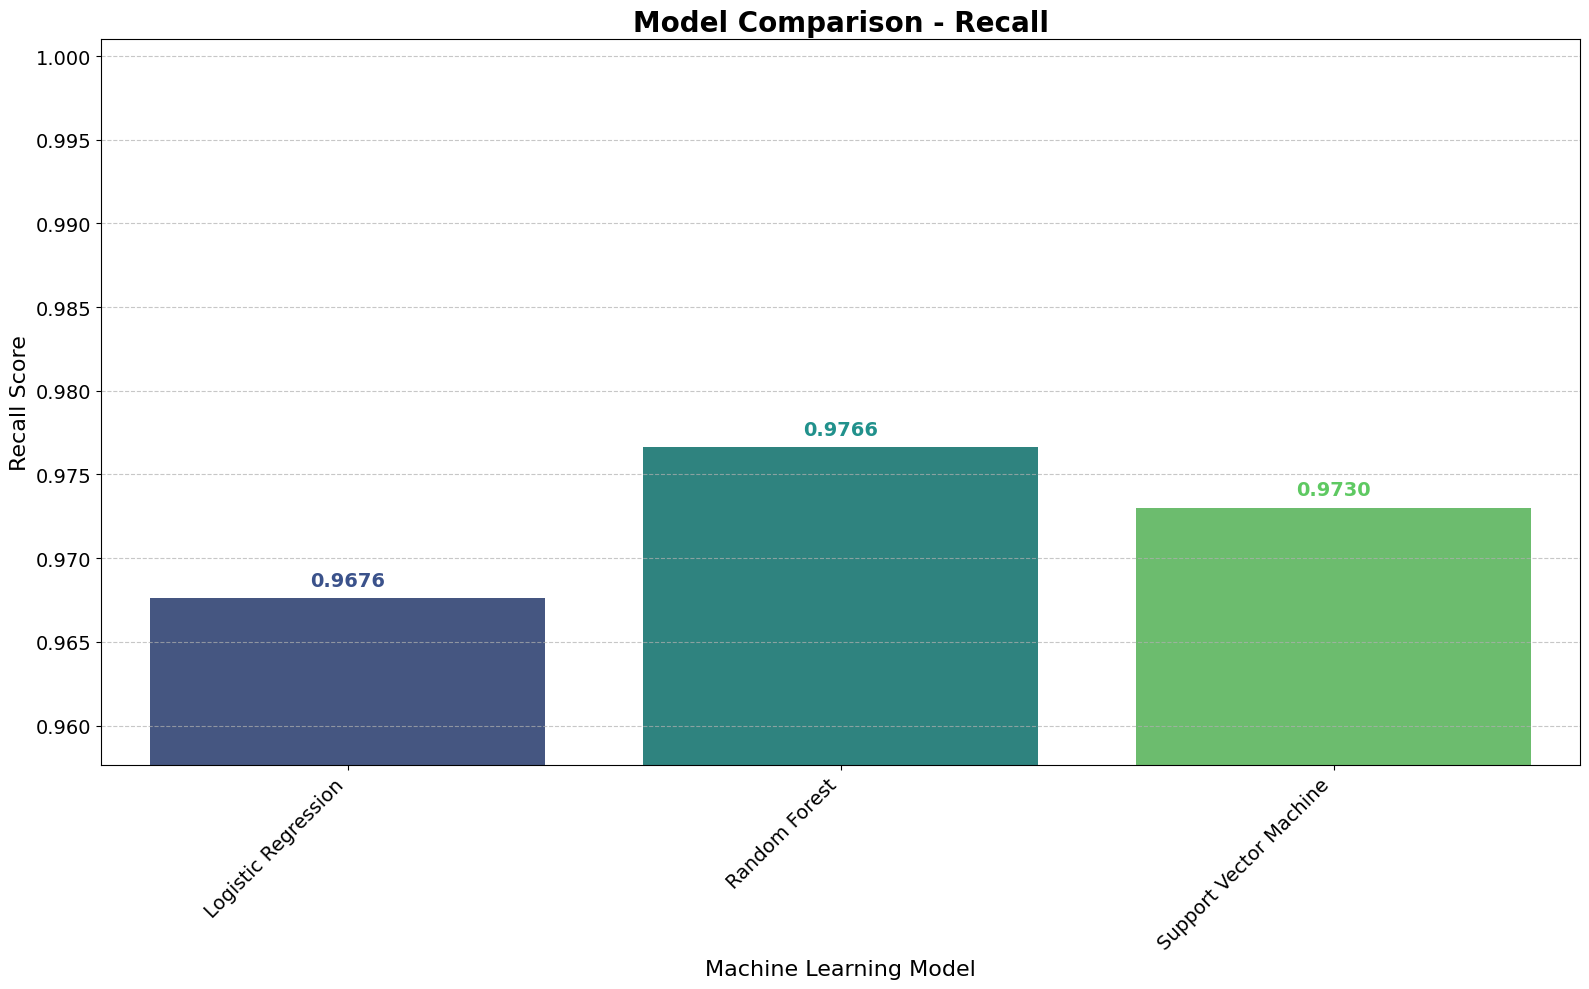

In [40]:
# Recall Comparison Visualization
plt.figure(figsize=(16, 10))

# Set a color palette for consistency
model_names = metrics_df['model_name']
colors = sns.color_palette("viridis", len(model_names))

# Plot with enhanced styling
ax = sns.barplot(x=model_names, y=metrics_df['recall'], palette=colors)

# Customize the plot
plt.title('Model Comparison - Recall', fontsize=20, fontweight='bold')
plt.xlabel('Machine Learning Model', fontsize=16)
plt.ylabel('Recall Score', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set y-axis limits to better visualize the differences
plt.ylim(metrics_df['recall'].min() - 0.01, 1.001)  # Dynamic adjustment with padding

# Add value labels on top of each bar
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.annotate(f"{height:.4f}", 
                (p.get_x() + p.get_width() / 2., height + 0.0005), 
                ha='center', va='bottom', 
                fontsize=14, fontweight='bold',
                color=colors[i])

plt.tight_layout()
plt.savefig('recall_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

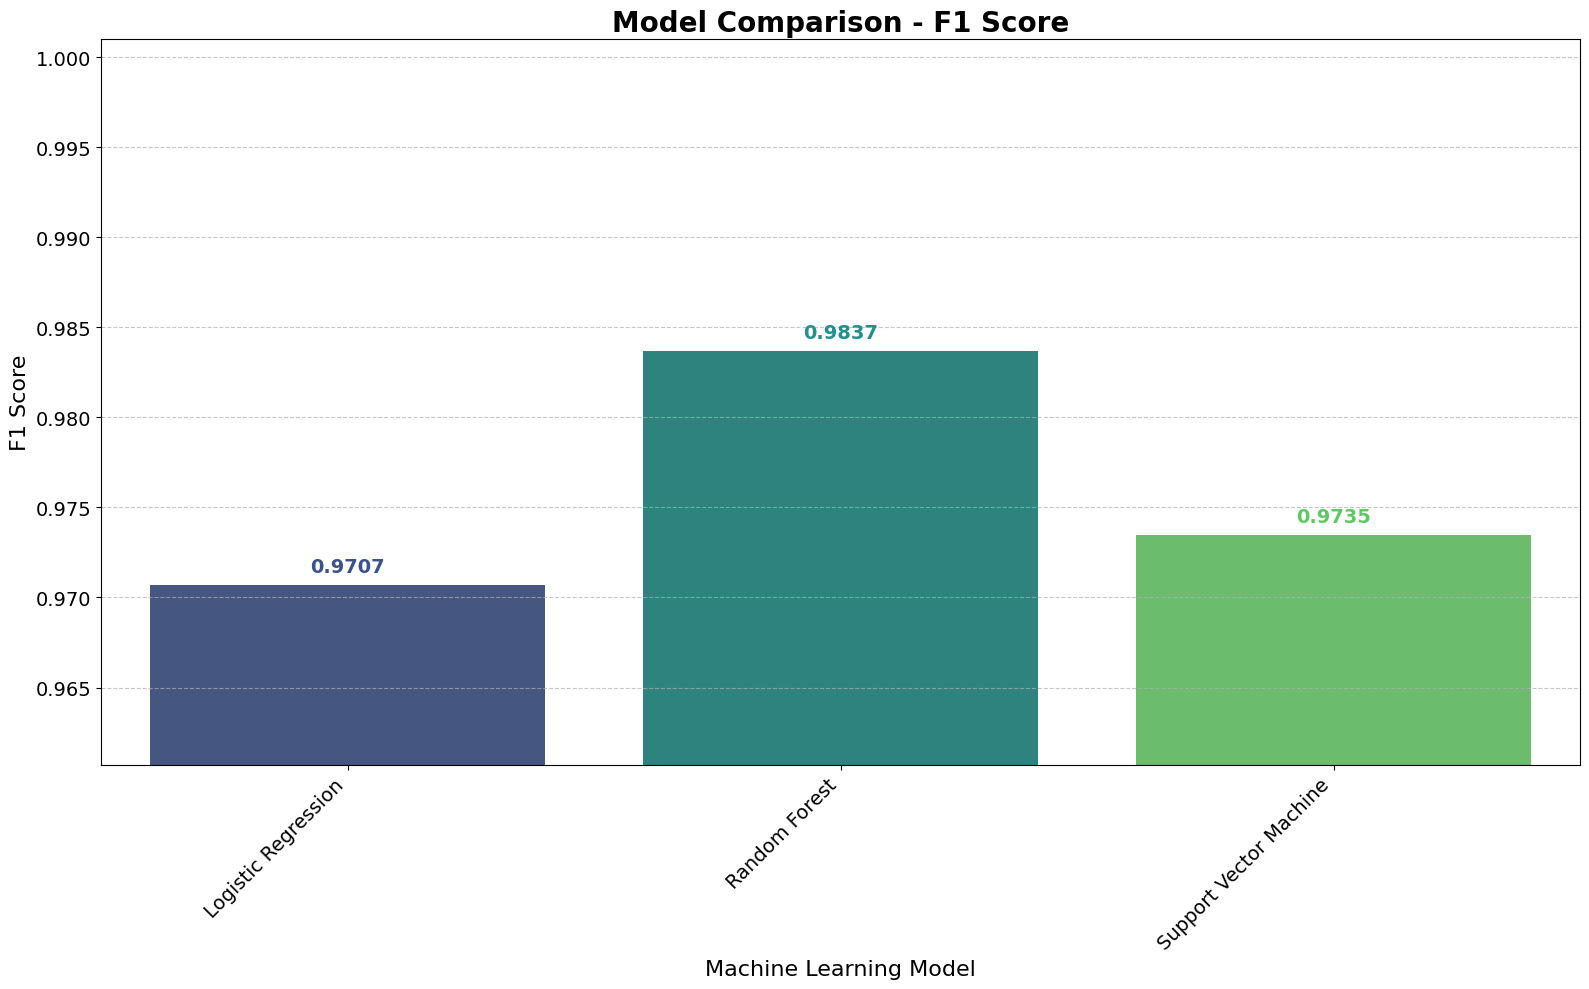

In [42]:
# F1 Score Comparison Visualization
plt.figure(figsize=(16, 10))

# Set a color palette for consistency
model_names = metrics_df['model_name']
colors = sns.color_palette("viridis", len(model_names))

# Plot with enhanced styling
ax = sns.barplot(x=model_names, y=metrics_df['f1'], palette=colors)

# Customize the plot
plt.title('Model Comparison - F1 Score', fontsize=20, fontweight='bold')
plt.xlabel('Machine Learning Model', fontsize=16)
plt.ylabel('F1 Score', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set y-axis limits to better visualize the differences
plt.ylim(metrics_df['f1'].min() - 0.01, 1.001)  # Dynamic adjustment with padding

# Add value labels on top of each bar
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.annotate(f"{height:.4f}", 
                (p.get_x() + p.get_width() / 2., height + 0.0005), 
                ha='center', va='bottom', 
                fontsize=14, fontweight='bold',
                color=colors[i])

plt.tight_layout()
plt.savefig('f1_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

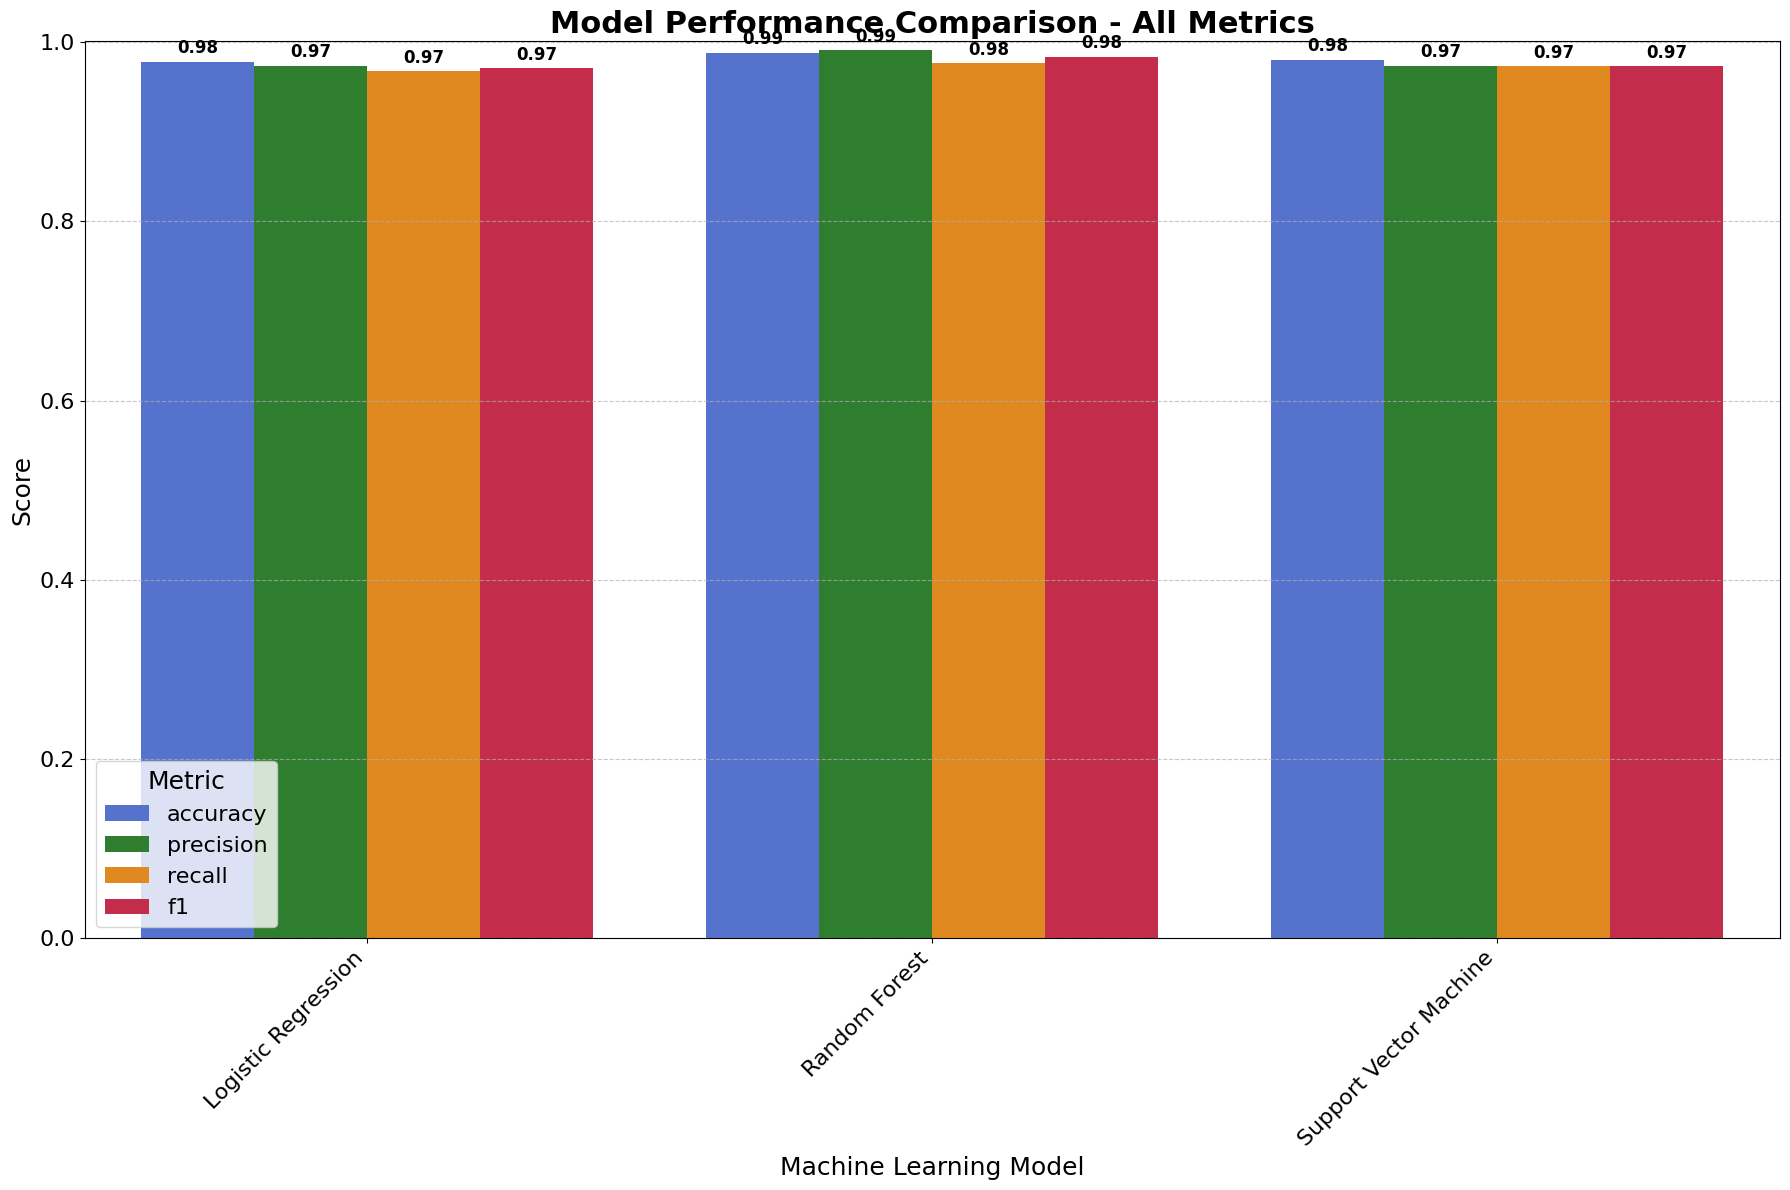

In [44]:
# Combined Metrics Visualization
plt.figure(figsize=(18, 12))

# Create a merged dataframe for easier plotting
metrics_melted = pd.melt(metrics_df, id_vars=['model_name'], 
                         value_vars=['accuracy', 'precision', 'recall', 'f1'],
                         var_name='Metric', value_name='Score')

# Custom colors for each metric
metric_colors = {
    'accuracy': 'royalblue',
    'precision': 'forestgreen', 
    'recall': 'darkorange',
    'f1': 'crimson'
}

# Plot grouped bar chart
ax = sns.barplot(x='model_name', y='Score', hue='Metric', data=metrics_melted, 
                palette=metric_colors)

# Customize the plot
plt.title('Model Performance Comparison - All Metrics', fontsize=22, fontweight='bold')
plt.xlabel('Machine Learning Model', fontsize=18)
plt.ylabel('Score', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set y-axis limits
plt.ylim(0, 1.001)

# Add value labels on top of each bar
for i, p in enumerate(ax.patches):
    height = p.get_height()
    if height > 0.03:  # Only add labels if the bar is tall enough
        ax.annotate(f"{height:.2f}", 
                    (p.get_x() + p.get_width() / 2., height + 0.005), 
                    ha='center', va='bottom', 
                    fontsize=12, fontweight='bold')

plt.legend(title='Metric', fontsize=16, title_fontsize=18)
plt.tight_layout()
plt.savefig('all_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

**Lab Logbook requirement**: Provide a graph comparing the performance of the AI model that you have developed.